<a href="https://colab.research.google.com/github/JamesMcGuigan/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/Week%201%20Exercise%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install tensorflow==2.0.0b1

In [29]:
import tensorflow as tf
print(tf.__version__)

# EXPECTED OUTPUT
# 2.0.0-beta1 (or later)

2.2.0-rc1


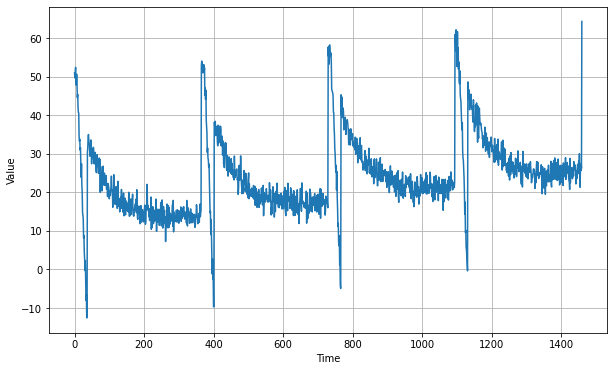

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time      = np.arange(4 * 365 + 1, dtype="float32")
baseline  = 10
series    = trend(time, 0.1)  
baseline  = 10
amplitude = 40
slope     = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

Now that we have the time series, let's split it so we can start forecasting

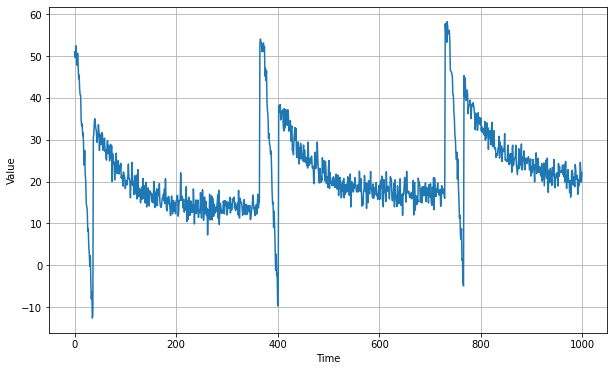

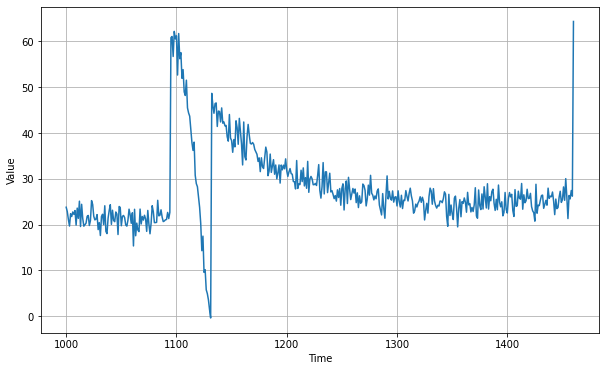

In [31]:
split_time = 1000
time_train = time[:split_time]
x_train    = series[:split_time]
time_valid = time[split_time:]
x_valid    = series[split_time:]
plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# EXPECTED OUTPUT
# Chart WITH 4 PEAKS between 50 and 65 and 3 troughs between -12 and 0
# Chart with 2 Peaks, first at slightly above 60, last at a little more than that, should also have a single trough at about 0

# Naive Forecast

In [0]:
naive_forecast = series[split_time-1:-1]

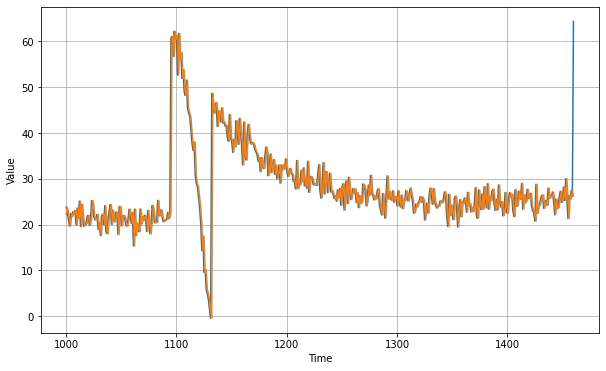

In [33]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

# Expected output: Chart similar to above, but with forecast overlay

Let's zoom in on the start of the validation period:

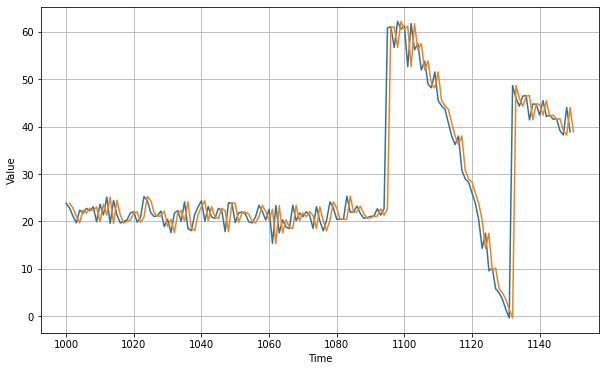

In [34]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid,        start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

# EXPECTED - Chart with X-Axis from 1100-1250 and Y Axes with series value and projections. Projections should be time stepped 1 unit 'after' series

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [35]:
print('numpy')
print( np.mean(np.square(x_valid - naive_forecast)) )
print( np.mean(np.abs(x_valid    - naive_forecast)) )

print()
print('sklearn.metrics')
import sklearn.metrics
print( sklearn.metrics.mean_squared_error(x_valid, naive_forecast))
print( sklearn.metrics.mean_absolute_error(    x_valid, naive_forecast))

print()
print('tf.keras.metrics')
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

# Expected Output
# 19.578304
# 2.6011968

numpy
20.158266
2.5868618

sklearn.metrics
20.158266
2.5868618

tf.keras.metrics
20.158268
2.5868616


That's our baseline, now let's try a moving average:

In [0]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  # if window_size == 1: return series[split_time-1:-1]
  maf = [ np.mean(series[n:n+window_size]) for n in range(0,len(series)-window_size)  ]
  # maf = np.array([series[max(i-r,0):min(i+r+1,N)].mean() for i in range(N)]) 
  return maf
  # windows = [ series[split_time-i:-i] for i in range(1,window_size+1) ]
  # return np.mean(windows)

In [37]:
display( moving_average_forecast([1,2,3,4,5], 2) )
display( moving_average_forecast([1,2,3,4,5,6,7,8,9,10],5) )

[1.5, 2.5, 3.5]

[3.0, 4.0, 5.0, 6.0, 7.0]

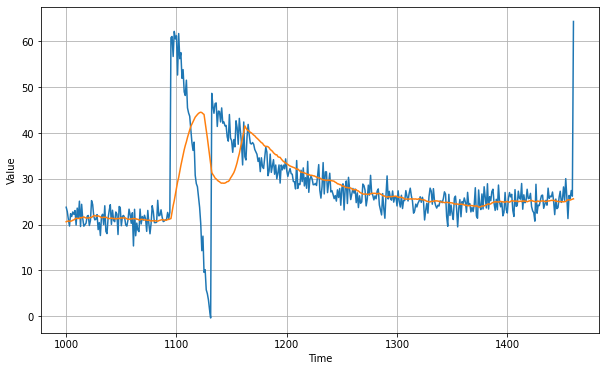

In [38]:
# moving_avg = moving_average_forecast(# YOUR CODE HERE)[# YOUR CODE HERE]
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]


plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
    
# EXPECTED OUTPUT
# CHart with time series from 1100->1450+ on X
# Time series plotted
# Moving average plotted over it

In [38]:
print(# YOUR CODE HERE)
print(# YOUR CODE HERE)
# EXPECTED OUTPUT
# 65.786224
# 4.3040023

SyntaxError: ignored

In [0]:
diff_series = (# YOUR CODE HERE)
diff_time = # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
    
# EXPECETED OUTPUT: CHart with diffs

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

In [0]:
diff_moving_avg = # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, # YOUR CODE HERE)
plot_series(time_valid, # YOUR CODE HERE)
plt.show()
            
# Expected output. Diff chart from 1100->1450 +
# Overlaid with moving average

Now let's bring back the trend and seasonality by adding the past values from t – 365:

In [0]:
diff_moving_avg_plus_past = # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, # YOUR CODE HERE)
plot_series(time_valid, # YOUR CODE HERE)
plt.show()
# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [0]:

print(# YOUR CODE HERE)
print(# YOUR CODE HERE)
# EXPECTED OUTPUT
# 8.498155
# 2.327179

Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

In [0]:
diff_moving_avg_plus_smooth_past = # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, # YOUR CODE HERE)
plot_series(time_valid, # YOUR CODE HERE)
plt.show()
            
# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [0]:
print(# YOUR CODE HERE)
print(# YOUR CODE HERE)
# EXPECTED OUTPUT
# 12.527958
# 2.2034433